### Prediction using Decision Tree Algorithm Task:- 3



__Author :- Harshada Jadhav__

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

 

__STEP 1__:-Importing libraries in Python and data description

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
df=pd.read_csv(r'C:\Users\hp\Desktop\Iris.csv')
df.head()

y=iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [45]:
#Summarized description of dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [46]:
##number of rows and columns
df.shape

(150, 6)

In [47]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [48]:
df['Species_class']=np.where(df.Species=='Iris-virginica',1,np.where(df.Species=='Iris-versicolor',2,3))
df.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [50]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [51]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Species_class    0
dtype: int64

No missing values, so no need to clean the data

__STEP 2__ :- Preparation of Model

In [52]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( df[cols],
                                                  df['Species_class'],
                                                  test_size = 0.2,
                                                  random_state = 123 )

__STEP 3__:- Model Building


In [53]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   44.7s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [55]:
tree.best_score_

0.95

In [56]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=2)

In [57]:
tree.best_params_

{'max_depth': 4, 'max_features': 2}

In [58]:
train_pred = tree.predict(train_X)
test_pred = tree.predict(test_X)

In [59]:
import sklearn.metrics as metrics
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6
           3       1.00      1.00      1.00        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



__STEP 4__ :-Building Final Decision Tree

In [60]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [61]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [62]:
tree_test_pred.sample( n = 10 )

,actual,predicted
135,1,1
13,3,3
90,2,2
141,1,1
104,1,1
33,3,3
63,2,2
138,1,1
88,2,2
37,3,3


In [63]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

C:\Users\hp\anaconda3\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 15.0, 'Predicted label')

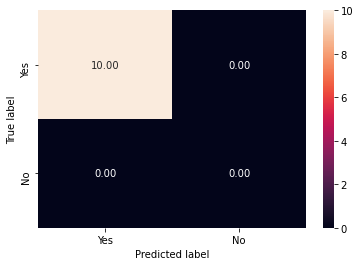

In [64]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

__STEP 5__:-Graphical Representation of Decision Tree

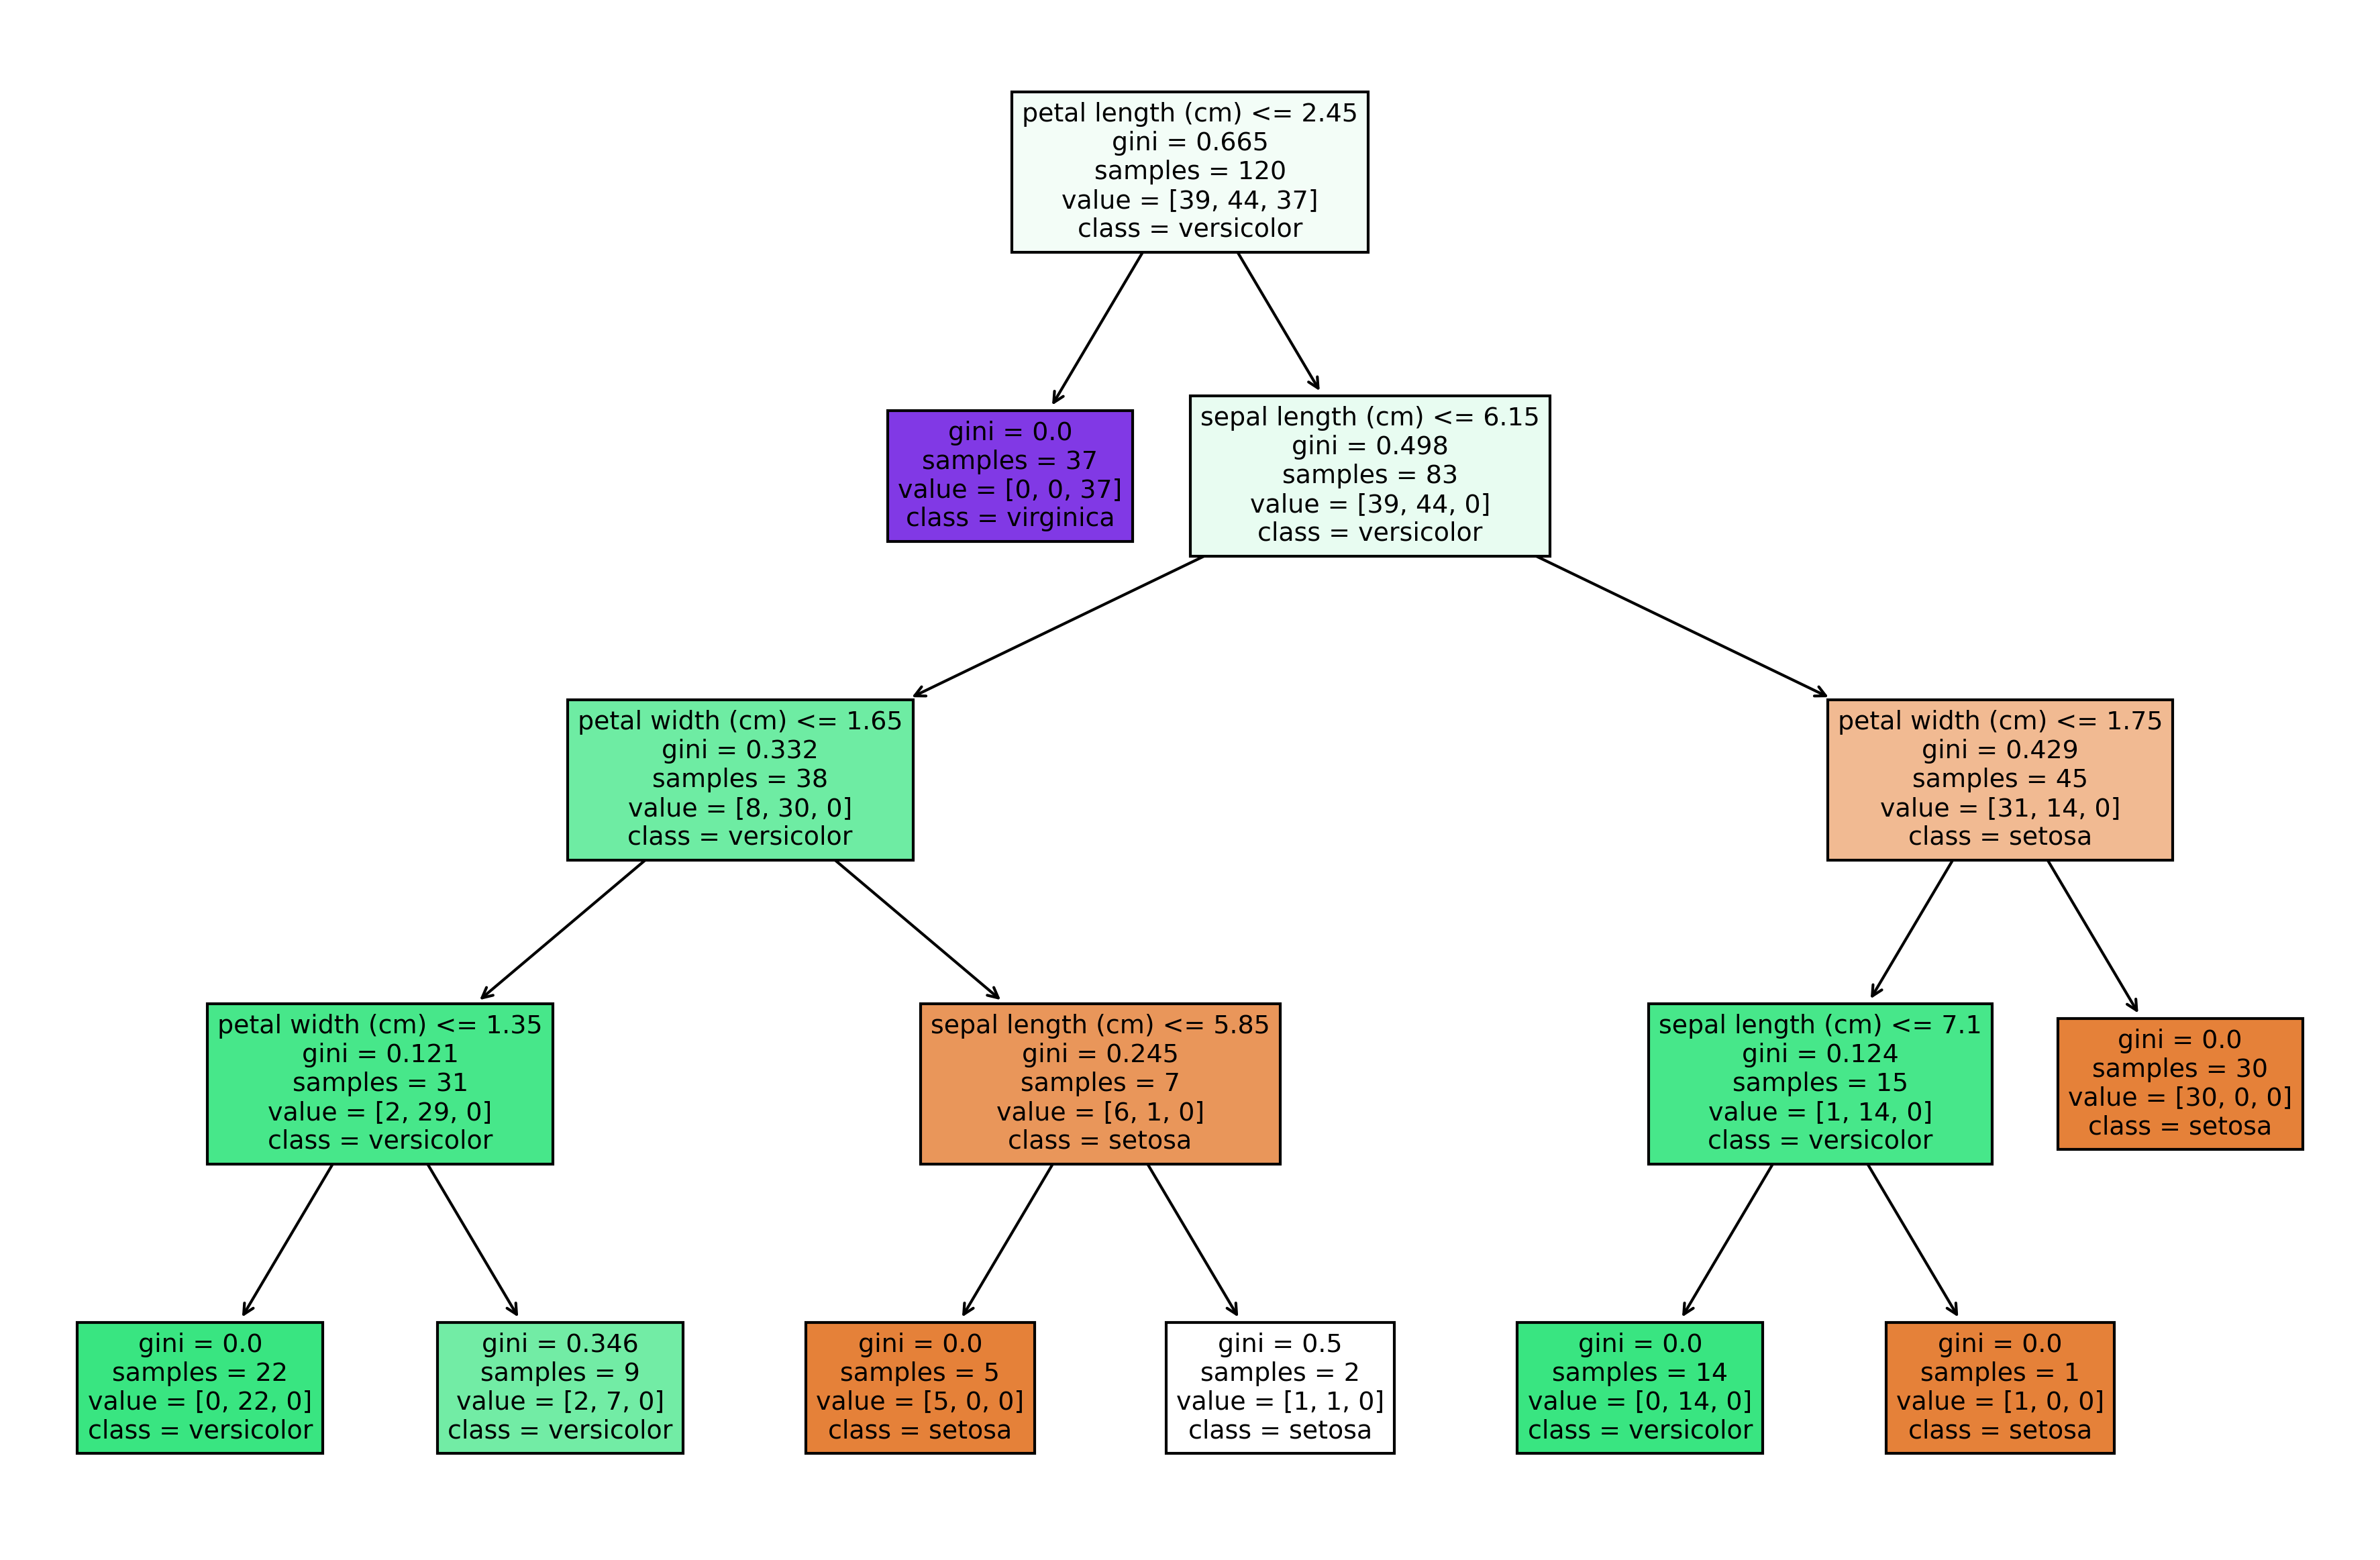

In [65]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

__CONCLUSION__

This is how we read, analyzed or visualized Iris Dataset using python and build a simple Decision Tree classifier for predicting Iris Species classes for new data points which we feed into classifier.

_Thanks !!_